In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
#import IPython.display
#import librosa.display
#!pip install librosa
#!pip install llvmlite

In [2]:
#conda install -c conda-forge librosa
import numpy as np
import librosa
import tensorflow as tf

C:\Users\Jaesung\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
import os
os.getcwd()
os.chdir('C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/JUNE_01_PHANTOMS')

In [4]:
import glob
uav_path = 'C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/JUNE_01_PHANTOMS/*.wav'
none_path = 'C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/JUNE_02_BACKGROUND/background_0*.wav'
uav_files = glob.glob(uav_path)
none_files = glob.glob(none_path)
print(uav_files)
print(none_files)

['C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/JUNE_01_PHANTOMS\\P1_stationary.wav', 'C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/JUNE_01_PHANTOMS\\P1_up_and_down.wav', 'C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/JUNE_01_PHANTOMS\\purdue_P2_unloaded_up_down.wav', 'C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/JUNE_01_PHANTOMS\\purrdue_P2_standing.wav', 'C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/JUNE_01_PHANTOMS\\WSU_P2_DOWN_UNLOADED.wav', 'C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/JUNE_01_PHANTOMS\\WSU_P2_HIGH_LOADED_DOWN.wav', 'C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/JUNE_01_PHANTOMS\\WSU_P2_LOADED_BACK_AND_

In [5]:
CHUNK_SIZE = 8192
SR = 44100
N_MFCC = 13

In [6]:
def load(files, sr=44100):
    [raw, sr] = librosa.load(files[0], sr=sr)
    for f in files[1:]:
        [array, sr] = librosa.load(f, sr=sr)
        raw = np.hstack((raw, array))
    print(raw.shape)
    return raw

In [7]:
uav_raw = load(uav_files)
none_raw = load(none_files)

(9732096,)
(18579456,)


### mfcc incremental

In [8]:
def mfcc(raw, chunk_size=8192, sr=44100, n_mfcc=13):
    mfcc = np.empty((13, 0))
    for i in range(0, len(raw), chunk_size):
        mfcc_slice = librosa.feature.mfcc(raw[i:i+chunk_size], sr=sr, n_mfcc=n_mfcc)
        mfcc = np.hstack((mfcc, mfcc_slice))
    return mfcc

In [9]:
mfcc_uav = mfcc(uav_raw)
mfcc_none = mfcc(none_raw)

In [10]:
print(mfcc_uav.shape)
print(mfcc_none.shape)

(13, 20196)
(13, 38556)


In [11]:
# or should we give one label to one chunk?
y_uav = np.ones(mfcc_uav.shape[1], dtype=int)
y_none =np.zeros(mfcc_none.shape[1], dtype=int)

print(y_uav.shape)
print(y_none.shape)

(20196,)
(38556,)


In [12]:
X = np.hstack((mfcc_uav, mfcc_none)).T
y = np.hstack((y_uav, y_none))
print(X.shape, y.shape)

(58752, 13) (58752,)


In [13]:
n_labels = y.shape[0]
n_unique_labels = 2
y_encoded = np.zeros((n_labels, n_unique_labels))
y_encoded[np.arange(n_labels), y] = 1
print(y_encoded.shape)

(58752, 2)


In [14]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [15]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

#

#(44236, 13) (11060, 13)
#(44236, 2) (11060, 2)

(47001, 13) (11751, 13)
(47001, 2) (11751, 2)


In [16]:
np.save('C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/Xy/X_train2', X_train)    
np.save('C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/Xy/X_test2', X_test)
np.save('C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/Xy/y_train2', y_train)
np.save('C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/Xy/y_test2', y_test)

In [17]:
X_train = np.load('C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/Xy/X_train2.npy')
X_test = np.load('C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/Xy/X_test2.npy')
y_train = np.load('C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/Xy/y_train2.npy')
y_test = np.load('C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/Xy/y_test2.npy')

# Tensorflow finally!

## Training

### Parameters
- need feedback on this!

In [18]:
n_dim = 13 #X_train.shape[1]
n_classes = 2
n_hidden_units_one = 280 
n_hidden_units_two = 300
sd = 1 / np.sqrt(n_dim)
learning_rate = 0.01

In [19]:
#수정하면서 돌려봄 
training_epochs = 400

In [20]:
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,n_classes])

W_1 = tf.Variable(tf.random_normal([n_dim,n_hidden_units_one], mean = 0, stddev=sd))
b_1 = tf.Variable(tf.random_normal([n_hidden_units_one], mean = 0, stddev=sd))
h_1 = tf.nn.tanh(tf.matmul(X,W_1) + b_1)


W_2 = tf.Variable(tf.random_normal([n_hidden_units_one,n_hidden_units_two], mean = 0, stddev=sd))
b_2 = tf.Variable(tf.random_normal([n_hidden_units_two], mean = 0, stddev=sd))
h_2 = tf.nn.sigmoid(tf.matmul(h_1,W_2) + b_2)


W = tf.Variable(tf.random_normal([n_hidden_units_two,n_classes], mean = 0, stddev=sd))
b = tf.Variable(tf.random_normal([n_classes], mean = 0, stddev=sd))
y_ = tf.nn.softmax(tf.matmul(h_2,W) + b)

init = tf.global_variables_initializer()

In [36]:
cost_function = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y_), reduction_indices=[1])) 
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost_function)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [37]:
print(X_train.shape, y_train.shape)

(47001, 13) (47001, 2)


In [38]:
model_path = '../models/my_test_model'
saver = tf.train.Saver()

In [34]:
cost_history = np.empty(shape=[1],dtype=float)
y_true, y_pred = None, None
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):            
        _,cost = sess.run([optimizer,cost_function],feed_dict={X:X_train,Y:y_train})
        cost_history = np.append(cost_history,cost)
    
    y_pred = sess.run(tf.argmax(y_,1),feed_dict={X: X_test})
    y_true = sess.run(tf.argmax(y_test,1))
    saver.save(sess, model_path)
    
    


In [51]:
batch_size = 100


cost_history = np.empty(shape=[1],dtype=float)
y_true, y_pred = None, None

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(47001 / batch_size)
   
    for i in range(total_batch):            
        _,cost = sess.run([optimizer,cost_function],feed_dict={X:X_train,Y:y_train})
        cost_history = np.append(cost_history,cost)
        avg_cost += cost / total_batch
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
   
       



y_pred = sess.run(tf.argmax(y_,1),feed_dict={X: X_test})
y_true = sess.run(tf.argmax(y_test,1))
saver.save(sess, model_path)

    

print('Learning Finished!')

Epoch: 0001 cost = 0.001602648
Epoch: 0001 cost = 0.009315826
Epoch: 0001 cost = 0.009962374
Epoch: 0001 cost = 0.019117697
Epoch: 0001 cost = 0.021222261
Epoch: 0001 cost = 0.021752981
Epoch: 0001 cost = 0.023944600
Epoch: 0001 cost = 0.026410452
Epoch: 0001 cost = 0.027908500
Epoch: 0001 cost = 0.028375213
Epoch: 0001 cost = 0.028710799
Epoch: 0001 cost = 0.029718960
Epoch: 0001 cost = 0.030652758
Epoch: 0001 cost = 0.031051114
Epoch: 0001 cost = 0.031257613
Epoch: 0001 cost = 0.031517915
Epoch: 0001 cost = 0.031911930
Epoch: 0001 cost = 0.032387071
Epoch: 0001 cost = 0.032838646


KeyboardInterrupt: 

In [26]:
y_pred.shape

(11751,)

In [28]:
y_true.shape

(11751,)

In [32]:
y_encoded.shape

(58752, 2)

### Below is for later when testing with pretrained model

In [28]:
with tf.Session() as sess:
    #sess.run(init)
    saver.restore(sess, model_path)
    y_pred = sess.run(tf.argmax(y_,1),feed_dict={X: X_test})
    y_true = sess.run(tf.argmax(y_test,1))

INFO:tensorflow:Restoring parameters from ../models/my_test_model


## Results
- Batch training and batch testing

In [30]:
y_true.shape

(58752,)

In [31]:
y_pred.shape

(11751,)

#### epoch=3200

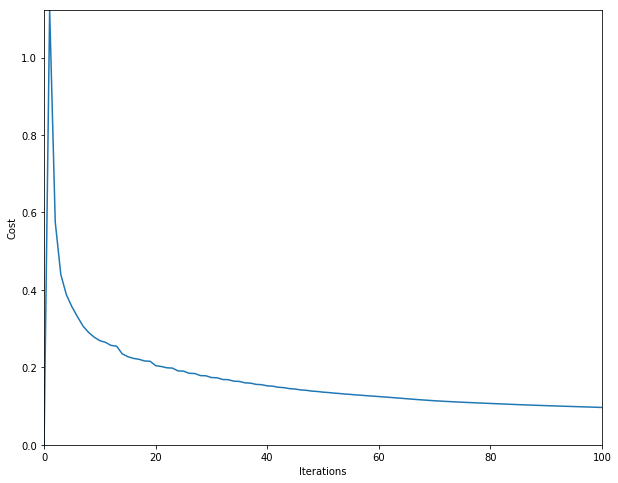

F-Score: 0.975
Accuracy:  0.9748106544123905
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      7719
          1       0.96      0.96      0.96      4032

avg / total       0.97      0.97      0.97     11751

[[7568  151]
 [ 145 3887]]


In [34]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print("F-Score:", round(f,3))
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_true, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

#### epoch=1600

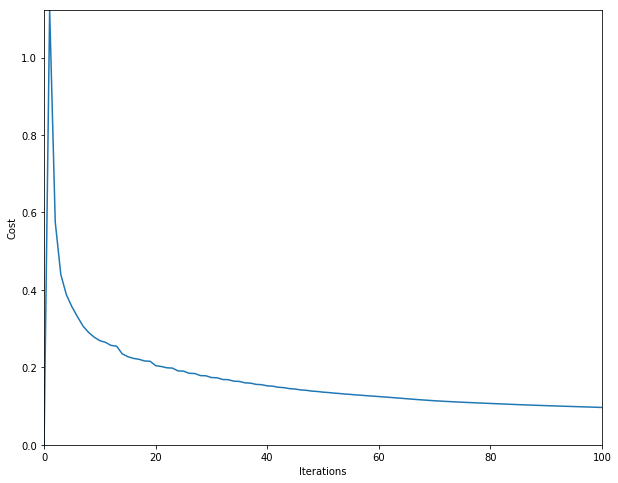

F-Score: 0.975
Accuracy:  0.9748106544123905
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      7719
          1       0.96      0.96      0.96      4032

avg / total       0.97      0.97      0.97     11751

[[7568  151]
 [ 145 3887]]


In [35]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print("F-Score:", round(f,3))
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_true, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

#### epoch=800

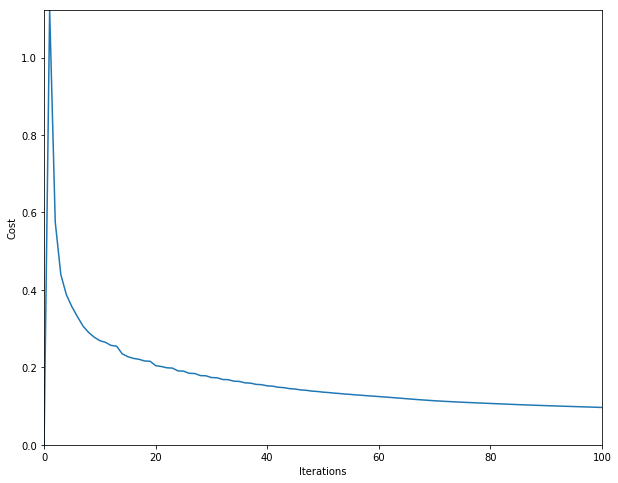

F-Score: 0.975
Accuracy:  0.9748106544123905
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      7719
          1       0.96      0.96      0.96      4032

avg / total       0.97      0.97      0.97     11751

[[7568  151]
 [ 145 3887]]


In [36]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print("F-Score:", round(f,3))
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_true, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

#### epoch=400_adam

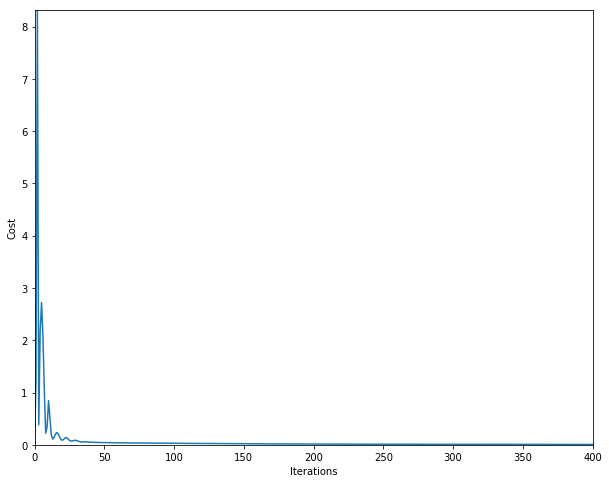

F-Score: 0.993
Accuracy:  0.9933622670411029
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      7719
          1       0.99      0.99      0.99      4032

avg / total       0.99      0.99      0.99     11751

[[7671   48]
 [  30 4002]]


In [29]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print("F-Score:", round(f,3))
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_true, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

<h5>epoch=400_gdo

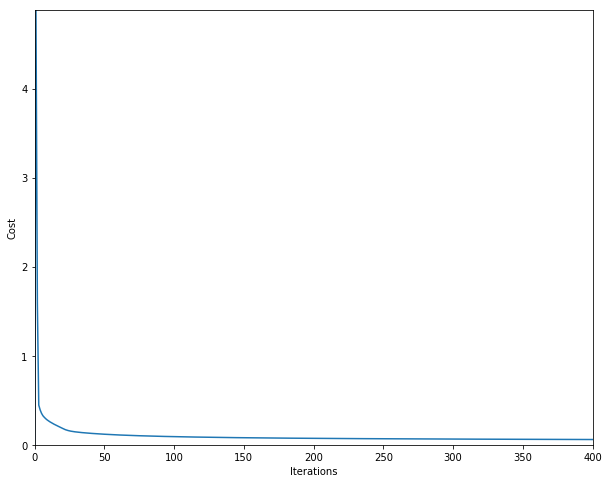

F-Score: 0.984
Accuracy:  0.9836609650242533
             precision    recall  f1-score   support

          0       0.99      0.98      0.99      7719
          1       0.97      0.98      0.98      4032

avg / total       0.98      0.98      0.98     11751

[[7602  117]
 [  75 3957]]


In [35]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print("F-Score:", round(f,3))
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_true, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

#### epoch=200

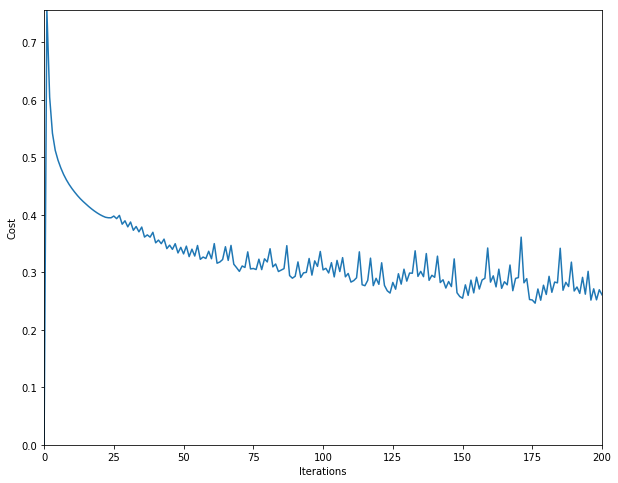

F-Score: 0.88
Accuracy:  0.8802893309222423
             precision    recall  f1-score   support

          0       0.85      0.99      0.92      7253
          1       0.97      0.67      0.80      3807

avg / total       0.89      0.88      0.87     11060

[[7168   85]
 [1239 2568]]


In [13]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print("F-Score:", round(f,3))
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_true, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

#### epoch=100

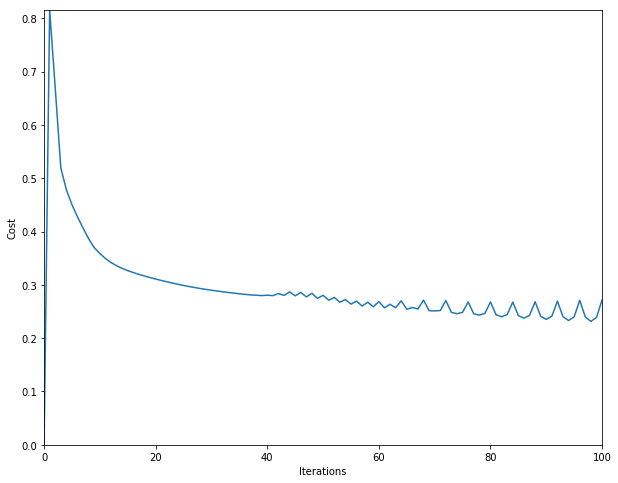

F-Score: 0.929
Accuracy:  0.9290235081374322
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      7253
          1       0.92      0.87      0.89      3807

avg / total       0.93      0.93      0.93     11060

[[6968  285]
 [ 500 3307]]


In [11]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print("F-Score:", round(f,3))
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_true, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

#### epoch=20

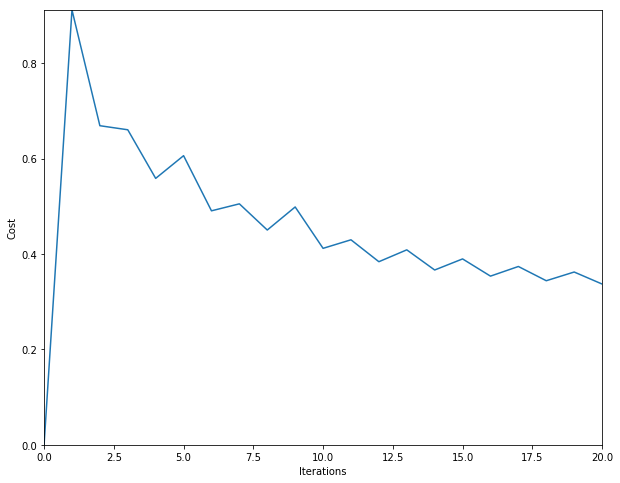

F-Score: 0.845
Accuracy:  0.8446654611211574
             precision    recall  f1-score   support

          0       0.82      0.99      0.89      7253
          1       0.96      0.57      0.72      3807

avg / total       0.86      0.84      0.83     11060

[[7155   98]
 [1620 2187]]


In [34]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print("F-Score:", round(f,3))
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_true, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))